In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


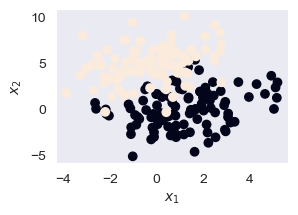

(200, 1)


In [15]:
np.random.seed(0)
def create_dataset(N=100):
    a = np.random.multivariate_normal([1, 0], [[3, 1], [1, 4]], size=[N,])
    b = np.random.multivariate_normal([0, 5], [[3, 1], [1, 4]], size=[N,])
    X = np.vstack((a, b))
    y = np.hstack((np.zeros(N), np.ones(N))).reshape(-1, 1)
    return X, y
X, y = create_dataset()
plt.figure(figsize=(3, 2))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()
print(y.shape)

In [16]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def loss_function(X, y, w):
  M = X.shape[0] # number of points in dataset
  y_hat = sigmoid(X @ w)
  loss = -1/M * (y.T @ np.log(y_hat) + (1 - y).T @ np.log(1 - y_hat))
  grad = 1/M * X.T @ (y_hat - y)
  return loss, grad

def gradient_descent(X, y, learning_rate=0.01, max_iter=1000):
  w = np.zeros((X.shape[1],1))
  loss_history = []
  for i in range(max_iter):
    loss, grad = loss_function(X, y, w)
    w = w - learning_rate * grad
    loss_history.append(loss)
  return w, loss_history

def add_ones(X):
  M = X.shape[0]
  return np.hstack((np.ones((M, 1)), X))

def logistic_reg(X,y):
  X1 = add_ones(X)
  w, _ = gradient_descent(X1, y)
  return w
w = logistic_reg(X, y)
print(w)

[[-0.88435066]
 [-0.75160453]
 [ 0.76211684]]


In [17]:
Xtest, ytest = create_dataset(10000)
Xtest1 = add_ones(Xtest)
yhat = sigmoid(Xtest1 @ w)

# metrics
def accuracy(y, yhat, thr=0.5):
    return np.mean((yhat > thr) == y)

def precision(y, yhat, thr=0.5):
    if np.sum(yhat > thr) == np.sum((yhat > thr) & (y == 1)):
        return 1.0
    return np.sum((yhat > thr) & (y == 1)) / np.sum(yhat > thr)

def recall(y, yhat, thr=0.5):
    return np.sum((yhat > thr) & (y == 1)) / np.sum(y == 1)

def f1_score(y, yhat, thr=0.5):
    p = precision(y, yhat, thr=thr)
    r = recall(y, yhat, thr=thr)
    return 2 * p * r / (p + r)

def specificity(y, yhat, thr=0.5):
    return np.sum((yhat <= thr) & (y == 0)) / np.sum(y == 0)

def confusion_matrix(y, yhat, thr=0.5):
    TP = np.sum((yhat > thr) & (y == 1))
    TN = np.sum((yhat <= thr) & (y == 0))
    FP = np.sum((yhat > thr) & (y == 0))
    FN = np.sum((yhat <= thr) & (y == 1))
    return np.array([[TP, FP], [FN, TN]])

acc = accuracy(ytest, yhat)
prec = precision(ytest, yhat)
rec = recall(ytest, yhat)
f1 = f1_score(ytest, yhat)
cm = confusion_matrix(ytest, yhat)
sp = specificity(ytest, yhat)
print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prec:.3f}')
print(f'Recall: {rec:.3f}')
print(f'Specificity: {sp:.3f}')
print(f'F1 Score: {f1:.3f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.899
Precision: 0.856
Recall: 0.959
Specificity: 0.839
F1 Score: 0.905
Confusion Matrix:
[[9594 1608]
 [ 406 8392]]


In [18]:
for thr in [0.9, 0.5, 0.1]:
    acc = accuracy(ytest, yhat, thr=thr)
    prec = precision(ytest, yhat, thr=thr)
    rec = recall(ytest, yhat, thr=thr)
    f1 = f1_score(ytest, yhat, thr=thr)
    sp = specificity(ytest, yhat, thr=thr)
    cm = confusion_matrix(ytest, yhat, thr=thr)
    print(f'Thr: {thr:.1f}')
    print(f'Accuracy: {acc:.3f}')
    print(f'Precision: {prec:.3f}')
    print(f'Recall: {rec:.3f}')
    print(f'Specificity: {sp:.3f}')
    print(f'F1 Score: {f1:.3f}')
    print('Confusion Matrix:')
    print(cm)
    print('---')

Thr: 0.9
Accuracy: 0.824
Precision: 0.983
Recall: 0.660
Specificity: 0.989
F1 Score: 0.790
Confusion Matrix:
[[6600  111]
 [3400 9889]]
---
Thr: 0.5
Accuracy: 0.899
Precision: 0.856
Recall: 0.959
Specificity: 0.839
F1 Score: 0.905
Confusion Matrix:
[[9594 1608]
 [ 406 8392]]
---
Thr: 0.1
Accuracy: 0.685
Precision: 0.613
Recall: 0.999
Specificity: 0.370
F1 Score: 0.760
Confusion Matrix:
[[9989 6296]
 [  11 3704]]
---


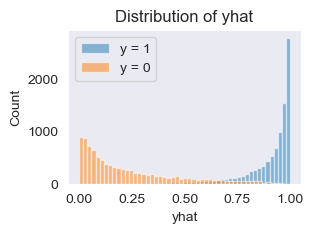

In [19]:
# distribution of yhat == 1 and yhat == 0
plt.figure(figsize=(3, 2))
plt.hist(yhat[ytest == 1], bins=50, alpha=0.5, label='y = 1')
plt.hist(yhat[ytest == 0], bins=50, alpha=0.5, label='y = 0')
plt.xlabel('yhat')
plt.ylabel('Count')
plt.title('Distribution of yhat')
plt.legend()
plt.grid()
plt.show()

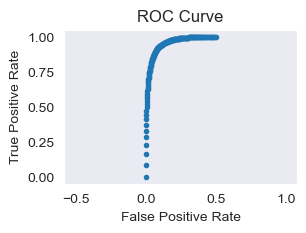

In [20]:
# roc curve
thrs = np.r_[0:1:200j]
tpr = np.array([recall(ytest, yhat, thr=t) for t in thrs])
fpr = np.array([1 - precision(ytest, yhat, thr=t) for t in thrs])
plt.figure(figsize=(3, 2))
plt.plot(fpr, tpr,'.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.axis('equal')
plt.grid()
plt.show()

In [21]:
# AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(ytest, yhat)
print(f'AUC: {auc:.3f}')

AUC: 0.973


<Figure size 300x200 with 0 Axes>

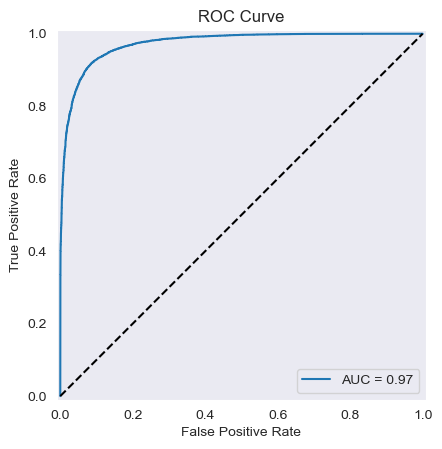

In [22]:
# display ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(ytest, yhat)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(3, 2))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()
